<a href="https://colab.research.google.com/github/abdulkhakam/portofolio-prediction-model/blob/main/usecase_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# impor paket untuk prediksi dan data untuk ekerimen

In [2]:
pip install jcopml #jika tidak ada modul/package jcopml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.3 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=0506839de0ca4d383f154ca7d33a53638596bfc63420a6a7ab1c42d0efce9b73
  Stored in directory: /root/.cache/pip/wheels/75/3e/99/c295e1e77d6c2c5d7db86f28daee05e6656bdfa86ae5001c00
Successfully built jcopml


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
path_1 = "/content/drive/MyDrive/FinanKu Data All.csv"
path_2 = "/content/drive/MyDrive/FinanKu Data Validasi.csv"
df_all = pd.read_csv(path_1)
df_val = pd.read_csv(path_2)

In [6]:
df1 = pd.read_csv(path_1) #untuk eksperimen 1
df2 = pd.read_csv(path_1) #untuk eksperimen 2

#review data untuk eksperimen 1 dan eksperimen 2

In [7]:
df1 = pd.read_csv(path_1)
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


In [8]:
df2 = pd.read_csv(path_2)
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


#Data Understanding

melihat persebaran nasabah berdasarkan lokasi
1. melihat perebaran nasabah keseluruhan di berbagai lokasi
2. meihat persebaran nasabah gagal bayar di berbagai lokasi

In [9]:
data1 = pd.DataFrame(\
                     #Mengkelompokkan Berdasarkan Kota
                     df_all.groupby(by=["City"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='Distribution by City'))
data1

,City,Distribution by City
0,Surabaya,3767
1,Bandung,1898
2,Jakarta,1896


In [10]:
data2 = pd.DataFrame(\
                     #Mengkelompokkan Berdasarkan Kota
                     df_all[df_all["Unpaid Tagging"]==1].groupby(by=["City"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='Distribution by City'))
data2

,City,Distribution by City
0,Surabaya,1033
1,Bandung,496
2,Jakarta,490


melihat usia nasabah
1. sebaran usia nasabah keseluruhan
2. sebarann usia nasabah yang gagal bayr

<Axes: title={'center': 'Cust. Distribution by Age'}, xlabel='Age', ylabel='# People'>

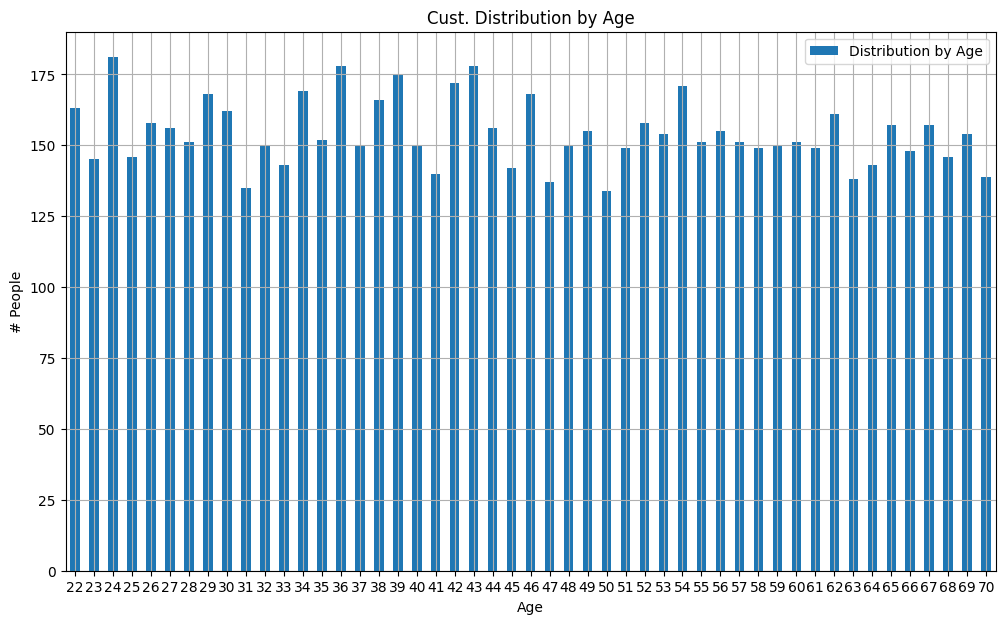

In [11]:
data3 = pd.DataFrame(\
                     #Mengkelompokkan Berdasarkan Umur
                     df_all.groupby(by=["Age"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mereset nama header
                     .reset_index(name='Distribution by Age'))

data3.sort_values(\
                  by=['Age'], \
                  ascending=True,\
                  inplace=True)


data3.plot(x='Age',
           y=['Distribution by Age'],
           kind='bar',
           grid = True,
           xlabel = 'Age',
           ylabel = '# People',
           figsize=(12,7),
           rot = 0,
           title = 'Cust. Distribution by Age',
           table = False,

           secondary_y = False)

<Axes: title={'center': 'Unpaidcust Distribution by Age'}, xlabel='Age', ylabel='# People'>

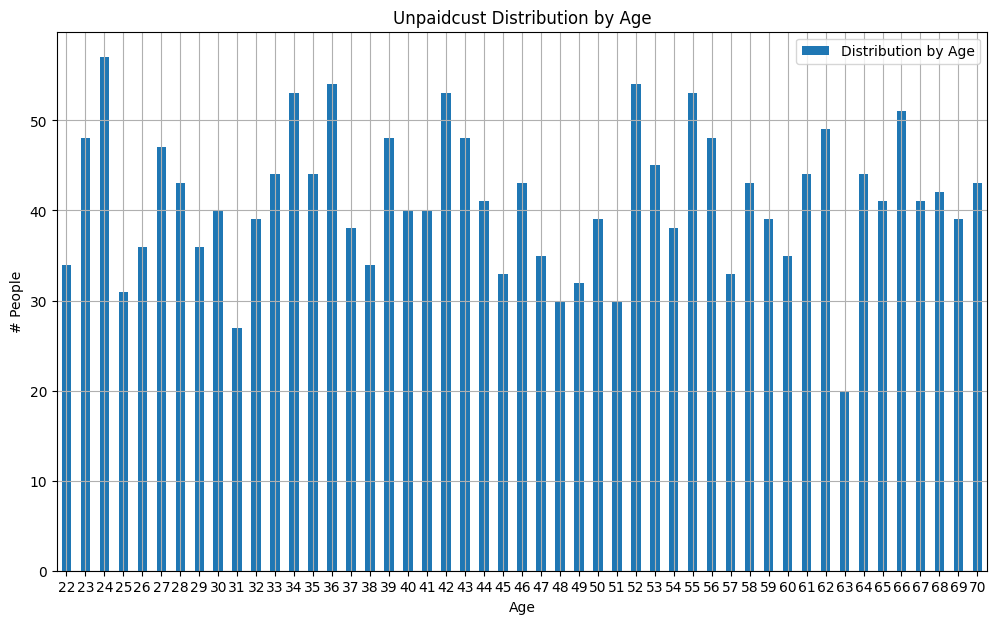

In [12]:
data4 = pd.DataFrame(\
                     #Mengkelompokkan Berdasarkan Umur
                     df_all[df_all["Unpaid Tagging"]==1].groupby(by=["Age"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mereset nama header
                     .reset_index(name='Distribution by Age'))

data4.sort_values(\
                  by=['Age'], \
                  ascending=True,\
                  inplace=True)


data4.plot(x='Age',
           y=['Distribution by Age'],
           kind='bar',
           grid = True,
           xlabel = 'Age',
           ylabel = '# People',
           figsize=(12,7),
           rot = 0,
           title = 'Unpaidcust Distribution by Age',
           table = False,

           secondary_y = False)

melihat rata ata saldo nasabah

In [13]:
df_checkbalance = df_all

In [14]:
df_checkbalance['Total Balance'] = (
df_checkbalance['Balance Q1']+
df_checkbalance['Balance Q2']+
df_checkbalance['Balance Q3']+
df_checkbalance['Balance Q4']
)
df_checkbalance['Avg Balance'] = (
 df_checkbalance['Balance Q1']+
  df_checkbalance['Balance Q2']+
  df_checkbalance['Balance Q3']+
  df_checkbalance['Balance Q4']
)/4

In [15]:
data5 = pd.DataFrame(\
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Total Balance"]\
                     .mean()\
                     .reset_index(name='Avg Annual Balance'))
data5

,Unpaid Tagging,Avg Annual Balance
0,0,1.985924e+08
1,1,2.527238e+08


In [16]:
data6 = pd.DataFrame(\
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg Balance"]\
                     .mean()\
                     .reset_index(name='Avg Quartal Balance'))
data6

,Unpaid Tagging,Avg Quartal Balance
0,0,4.964809e+07
1,1,6.318095e+07


Rata Rata kepemilikan produk bank oleh nasabah

In [17]:
df_checkbalance['Avg Product'] = (df_checkbalance['NumOfProducts Q1']+df_checkbalance['NumOfProducts Q2']+df_checkbalance['NumOfProducts Q3']+df_checkbalance['NumOfProducts Q4'])/4


In [18]:
data7 = pd.DataFrame(\
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg Product"]\
                     .mean()\
                     .reset_index(name='Avg Product Owned'))
data7

,Unpaid Tagging,Avg Product Owned
0,0,1.667223
1,1,1.609336


In [19]:
df_all = df_all.drop(columns=['Total Balance', 'Avg Balance','Avg Product'])

# Data Preparation
## mengecek dan memastikan tidak ada data duplikat, missing value, atau null

In [20]:
df_all.duplicated().sum()

np.int64(0)

In [21]:
df_all.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q1,0
NumOfProducts Q1,0
HasCrCard Q1,0
ActiveMember Q1,0
Balance Q2,0


# Penambahan Variable yang relevan
## rata rata saldo dan perubahan saldo selama periode observasi
### Melihat saldo nasabah dalam scope observasi
1. Experiment 1: Rata-rata saldo nasabah dalam 1 tahun terakhir & Perubahan Saldo di Q4 terhadap Q1
2. Experiment 2: Rata-rata saldo nasabah dalam 6 bulan terakhir & Perubahan Saldo di Q4 terhadap Q2

### eksperimen 1

In [22]:
df1['Mean Balance'] = (df1['Balance Q1']+df1['Balance Q2']+df1['Balance Q3']+df1['Balance Q4'])/4
df1['Delta Balance'] = df1['Balance Q4']-df1['Balance Q1']

df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68


### Eksperimen 2

In [23]:
df2['Mean Balance'] = (df2['Balance Q3']+df2['Balance Q4'])/2
df2['Delta Balance'] = df2['Balance Q4']-df2['Balance Q2']
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68


### Status Keaftifan Nasabah:

## melihat periode nasabah aktif dalam scope waktu tertentu
1. eksperimen 1 --> keaktifan nasabah (dalam bulan) 1 tahun terakhir
2. eksperimen 2 --> keaktifan nasabah (dalam bulan) 6 bbulan terakhir

### Eksperimen 1

In [24]:
df1['Active Months'] = (df1['ActiveMember Q1']+df1['ActiveMember Q2']+df1['ActiveMember Q3']+df1['ActiveMember Q4'])*3

df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6


### Eksperimen 2

In [25]:
df2['Active Months'] = (df2['ActiveMember Q3']+df2['ActiveMember Q4'])*3

df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68,6


### Penambahan atau Pengurangan Product Holding
melihat fluktuasi kepemilikan produk bank nasabah dalam periode observasi

## Eksperimen 1


In [26]:
df1[' Diff PH'] = df1['NumOfProducts Q4']-df1['NumOfProducts Q1']
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0


## Eksperimen 2

In [27]:
df2[' Diff PH'] = df2['NumOfProducts Q4']-df2['NumOfProducts Q2']
df2.head()


,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68,6,0


## Lama kepemilikan Kartu kredit nasabah dalam periode observasi

In [28]:
def assign_cr1 (df):
    if df['HasCrCard Q1'] == 1:
        return 12
    elif df['HasCrCard Q2'] == 1:
        return 9
    elif df['HasCrCard Q3'] == 1:
        return 6
    else:
        return 3
    return np.nan

### Eksperimen 1

In [29]:
df1['Vintage_CR'] = df1.apply(assign_cr1, axis=1)
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0,12


## Eksperimen 2

In [30]:
def assign_cr1 (df):
    if df['HasCrCard Q2'] == 1:
        return 12
    elif df['HasCrCard Q3'] == 1:
        return 9
    elif df['HasCrCard Q4'] == 1:
        return 6
    else:
        return 3
    return np.nan
df2['Vintage_CR'] = df2.apply(assign_cr1, axis=1)
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00,0,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68,6,0,12


# Penghapusan Variabel

status kepemilikan diganti dengan lama kepemilikan kartu kredit

In [31]:
df1 = df1.drop(columns=['HasCrCard Q1','HasCrCard Q2','HasCrCard Q3','HasCrCard Q4'])
df2 = df2.drop(columns=['HasCrCard Q2','HasCrCard Q3','HasCrCard Q4', 'HasCrCard Q5'])

In [32]:
print("Columns in df1 before dropping HasCrCard:")
print(df1.columns)
print("Columns in df2 before dropping HasCrCard:")
print(df2.columns)

Columns in df1 before dropping HasCrCard:
Index(['Customer ID', 'Branch Code', 'City', 'Age', 'Avg. Annual Income/Month',
       'Balance Q1', 'NumOfProducts Q1', 'ActiveMember Q1', 'Balance Q2',
       'NumOfProducts Q2', 'ActiveMember Q2', 'Balance Q3', 'NumOfProducts Q3',
       'ActiveMember Q3', 'Balance Q4', 'NumOfProducts Q4', 'ActiveMember Q4',
       'Unpaid Tagging', 'Mean Balance', 'Delta Balance', 'Active Months',
       ' Diff PH', 'Vintage_CR'],
      dtype='object')
Columns in df2 before dropping HasCrCard:
Index(['Customer ID', 'Branch Code', 'City', 'Age', 'Avg. Annual Income/Month',
       'Balance Q2', 'NumOfProducts Q2', 'ActiveMember Q2', 'Balance Q3',
       'NumOfProducts Q3', 'ActiveMember Q3', 'Balance Q4', 'NumOfProducts Q4',
       'ActiveMember Q4', 'Balance Q5', 'NumOfProducts Q5', 'ActiveMember Q5',
       'Unpaid Tagging', 'Mean Balance', 'Delta Balance', 'Active Months',
       ' Diff PH', 'Vintage_CR'],
      dtype='object')


balance per quarter

In [33]:
df1 = df1.drop(columns=['Balance Q1','Balance Q2','Balance Q3','Balance Q4'])
df2 = df2.drop(columns=['Balance Q2','Balance Q3','Balance Q4','Balance Q5'])

jumlah kepemilikan produk diganti dengan fluktuasi kepemilikan produk pada periode observasi

In [34]:
df1 = df1.drop(columns=['NumOfProducts Q1','NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4'])
df2 = df2.drop(columns=['NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4','NumOfProducts Q5'])


status keaktifan nasabah per quarter diganti dengan status keaktifan nasabah perbulan

In [35]:
df1 = df1.drop(columns=['ActiveMember Q1','ActiveMember Q2','ActiveMember Q3','ActiveMember Q4'])
df2 = df2.drop(columns=['ActiveMember Q2','ActiveMember Q3','ActiveMember Q4','ActiveMember Q5'])

# Data Transformation

## pemisahan variabel prediktor

In [36]:
predictor1 = df1[df1.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2 = df2[df2.columns.difference(['Customer ID', 'Unpaid Tagging'])]

In [37]:
predictor1.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Mean Balance,Vintage_CR
0,0,6,29,33000000,1001,Jakarta,1187036.18,296759.045,12
1,0,3,68,17000000,1005,Jakarta,0.00,0.000,12
2,0,3,25,12000000,1009,Jakarta,1351820.24,337955.060,12
3,0,3,42,19000000,1008,Jakarta,0.00,0.000,12
4,0,6,43,29000000,1009,Jakarta,431190.68,277524.090,12


In [38]:
predictor2.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Mean Balance,Vintage_CR
0,0,3,29,33000000,1001,Jakarta,1187036.18,593518.09,12
1,0,0,68,17000000,1005,Jakarta,0.00,0.00,12
2,0,3,25,12000000,1009,Jakarta,1351820.24,675910.12,12
3,0,0,42,19000000,1008,Jakarta,0.00,0.00,12
4,0,6,43,29000000,1009,Jakarta,431190.68,555048.18,12


# Melakukan encoding untuk data category
## variabel category
1. branch code
2. city

untuk branch code perlu diubah menjadi string agar terbaca sebagai data kategori

In [39]:
predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)

/tmp/ipython-input-1205290035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
/tmp/ipython-input-1205290035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)


In [40]:
predictor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    Diff PH                  7561 non-null   int64  
 1   Active Months             7561 non-null   int64  
 2   Age                       7561 non-null   int64  
 3   Avg. Annual Income/Month  7561 non-null   int64  
 4   Branch Code               7561 non-null   object 
 5   City                      7561 non-null   object 
 6   Delta Balance             7561 non-null   float64
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [41]:
predictor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    Diff PH                  7561 non-null   int64  
 1   Active Months             7561 non-null   int64  
 2   Age                       7561 non-null   int64  
 3   Avg. Annual Income/Month  7561 non-null   int64  
 4   Branch Code               7561 non-null   object 
 5   City                      7561 non-null   object 
 6   Delta Balance             7561 non-null   float64
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [42]:
predictor1 = pd.get_dummies(predictor1)
predictor2 = pd.get_dummies(predictor2)

In [43]:
predictor1.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,0,6,29,33000000,1187036.18,296759.045,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,3,68,17000000,0.00,0.000,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,3,25,12000000,1351820.24,337955.060,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,0,3,42,19000000,0.00,0.000,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,6,43,29000000,431190.68,277524.090,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [44]:
predictor2.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,0,3,29,33000000,1187036.18,593518.09,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,68,17000000,0.00,0.00,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,3,25,12000000,1351820.24,675910.12,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,42,19000000,0.00,0.00,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,6,43,29000000,431190.68,555048.18,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [45]:
predname = predictor1.columns
predname_num = predictor1.columns[0:7]
predname_cat = predictor1.columns[7:31]

In [46]:
predname

Index([' Diff PH', 'Active Months', 'Age', 'Avg. Annual Income/Month',
       'Delta Balance', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [47]:
predname_num

Index([' Diff PH', 'Active Months', 'Age', 'Avg. Annual Income/Month',
       'Delta Balance', 'Mean Balance', 'Vintage_CR'],
      dtype='object')

In [48]:
predname_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

In [49]:
x1_num = predictor1[predname_num]
x1_cat = predictor1[predname_cat]
x2_num = predictor2[predname_num]
x2_cat = predictor2[predname_cat]

# Standarisasi Data Numerik

In [50]:
from re import X
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
x1_num = pd.DataFrame(pt.fit_transform(x1_num))
x1_num.head()

,0,1,2,3,4,5,6
0,-0.531491,-0.135176,-1.185374,0.663649,1.964593,-0.947970,0.296502
1,-0.531491,-1.013239,1.580668,-0.680854,-0.319523,-0.953281,0.296502
2,-0.531491,-1.013239,-1.469071,-1.101011,2.281673,-0.947232,0.296502
3,-0.531491,-1.013239,-0.263360,-0.512791,-0.319523,-0.953281,0.296502
4,-0.531491,-0.135176,-0.192436,0.327524,0.510182,-0.948314,0.296502


In [51]:
x1_num.columns = predname_num
x1_num.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
0,-0.531491,-0.135176,-1.185374,0.663649,1.964593,-0.947970,0.296502
1,-0.531491,-1.013239,1.580668,-0.680854,-0.319523,-0.953281,0.296502
2,-0.531491,-1.013239,-1.469071,-1.101011,2.281673,-0.947232,0.296502
3,-0.531491,-1.013239,-0.263360,-0.512791,-0.319523,-0.953281,0.296502
4,-0.531491,-0.135176,-0.192436,0.327524,0.510182,-0.948314,0.296502


In [52]:
x2_num = pd.DataFrame(pt.fit_transform(x2_num))
x2_num.head()

,0,1,2,3,4,5,6
0,-0.440014,-0.165835,-1.185374,0.663649,2.641819,-0.944440,0.296502
1,-0.440014,-1.471959,1.580668,-0.680854,-0.233476,-0.955071,0.296502
2,-0.440014,-0.165835,-1.469071,-1.101011,3.040967,-0.942964,0.296502
3,-0.440014,-1.471959,-0.263360,-0.512791,-0.233476,-0.955071,0.296502
4,-0.440014,1.140289,-0.192436,0.327524,0.810974,-0.945129,0.296502


In [53]:
x2_num.columns = predname_num
x2_num.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
0,-0.440014,-0.165835,-1.185374,0.663649,2.641819,-0.944440,0.296502
1,-0.440014,-1.471959,1.580668,-0.680854,-0.233476,-0.955071,0.296502
2,-0.440014,-0.165835,-1.469071,-1.101011,3.040967,-0.942964,0.296502
3,-0.440014,-1.471959,-0.263360,-0.512791,-0.233476,-0.955071,0.296502
4,-0.440014,1.140289,-0.192436,0.327524,0.810974,-0.945129,0.296502


# Menggabungkan Dataset Predictor

In [54]:
x1 = pd.concat([x1_cat, x1_num], axis=1)
x2 = pd.concat([x2_cat, x2_num], axis=1)

In [55]:
x1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-0.135176,-1.185374,0.663649,1.964593,-0.947970,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,1.580668,-0.680854,-0.319523,-0.953281,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,-1.469071,-1.101011,2.281673,-0.947232,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,-0.263360,-0.512791,-0.319523,-0.953281,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-0.135176,-0.192436,0.327524,0.510182,-0.948314,0.296502


In [56]:
x2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-0.165835,-1.185374,0.663649,2.641819,-0.944440,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-1.471959,1.580668,-0.680854,-0.233476,-0.955071,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-0.165835,-1.469071,-1.101011,3.040967,-0.942964,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-1.471959,-0.263360,-0.512791,-0.233476,-0.955071,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,1.140289,-0.192436,0.327524,0.810974,-0.945129,0.296502


In [57]:
y1 = df1['Unpaid Tagging']
y2 = df2['Unpaid Tagging']

In [58]:
y1.head()

,Unpaid Tagging
0,1
1,0
2,0
3,0
4,0


# Mempersiapkan Dataset untuk Validation

## Import data

In [59]:
df1_val = pd.read_csv(path_2)
df1_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


In [60]:
df2_val = pd.read_csv(path_2)
df2_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


## Penambahan Variabel Relevan

In [61]:
#rata rata balance
df1_val['Mean Balance'] = (df1_val['Balance Q2']+df1_val['Balance Q3']+df1_val['Balance Q4']+df1_val['Balance Q5'])/4
df2_val['Mean Balance'] = (df2_val['Balance Q4']+df1_val['Balance Q5'])/2

In [62]:
#perubahan Saldo
df1_val['Delta Balance'] = df1_val['Balance Q5']-df1_val['Balance Q2']
df2_val['Delta Balance'] = df2_val['Balance Q5']-df2_val['Balance Q3']

## Status keaktifan

In [63]:
df1_val['Active Months'] = (df1_val['ActiveMember Q2']+df1_val['ActiveMember Q3']+df1_val['ActiveMember Q4']+df1_val['ActiveMember Q5'])*3
df2_val['Active Months'] = (df2_val['ActiveMember Q4']+df1_val['ActiveMember Q5'])*3

## Penambahan/Pengurangan Produk Holding

In [64]:
df1_val[' Diff PH'] = df1_val['NumOfProducts Q5']-df1_val['NumOfProducts Q2']
df2_val[' Diff PH'] = df2_val['NumOfProducts Q5']-df1_val['NumOfProducts Q3']

## Lama Kepemilikan Kartu Kredit

In [65]:
def assign_cr2(df):
    if df['HasCrCard Q2'] == 1:
        return 12
    elif df['HasCrCard Q3'] == 1:
        return 9
    elif df['HasCrCard Q4'] == 1:
        return 6
    else:
        return 3
    return np.nan

In [66]:
df1_val['Vintage_CR'] = df1_val.apply(assign_cr2, axis=1)
df2_val['Vintage_CR'] = df2_val.apply(assign_cr2, axis=1)

## Penghapusan Variabel

In [67]:
df1_val = df1_val.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df2_val = df2_val.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

In [68]:
df1_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,6.231940e+05,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,7.435011e+05,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,3.853218e+05,4.311907e+05,6,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.647607e+07,1.365946e+07,9,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.234332e+08,5.441502e+07,9,2,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.247047e+05,2.996062e+05,3,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.243379e+07,1.169147e+07,9,0,6


In [69]:
df2_val.head(15)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,1.246388e+06,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,1.487002e+06,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,4.311907e+05,-2.477150e+05,3,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.990946e+07,1.338732e+07,6,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.370369e+08,5.481477e+07,3,1,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.996062e+05,0.000000e+00,0,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.535666e+07,1.191023e+07,3,0,6


## Pemilihan variabel prediktor

In [70]:
predictor1_val = df1_val[df1_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2_val = df2_val[df2_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]


In [71]:
predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)

/tmp/ipython-input-2594155773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
/tmp/ipython-input-2594155773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)


In [72]:
predictor1_val = pd.get_dummies(predictor1_val)
predictor2_val = pd.get_dummies(predictor2_val)

In [73]:
predictor1_val.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,0,6,29,33000000,1305739.798,623193.9945,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,68,17000000,0.000,0.0000,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,6,25,12000000,1622184.288,743501.1320,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,2,0,42,19000000,0.000,0.0000,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,6,43,29000000,431190.680,385321.7600,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [74]:
predictor2_val.head()

,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,0,6,29,33000000,1305739.798,1246387.989,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,68,17000000,0.000,0.000,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,6,25,12000000,1622184.288,1487002.264,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,2,0,42,19000000,0.000,0.000,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,3,43,29000000,-247715.000,431190.680,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [75]:
x1_num_val = predictor1_val[predname_num]
x2_num_val = predictor2_val[predname_num]
x1_cat_val = predictor1_val[predname_cat]
x2_cat_val = predictor2_val[predname_cat]

In [76]:
x1_num_val = pd.DataFrame(pt.fit_transform(x1_num_val))
x1_num_val.columns = predname_num

x2_num_val = pd.DataFrame(pt.fit_transform(x2_num_val))
x2_num_val.columns = predname_num

In [77]:
x1_val = pd.concat([x1_cat, x1_num], axis=1)
x2_val = pd.concat([x2_cat, x2_num], axis=1)

In [78]:
x1_val.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-0.135176,-1.185374,0.663649,1.964593,-0.947970,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,1.580668,-0.680854,-0.319523,-0.953281,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,-1.469071,-1.101011,2.281673,-0.947232,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,-0.263360,-0.512791,-0.319523,-0.953281,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-0.135176,-0.192436,0.327524,0.510182,-0.948314,0.296502


In [79]:
y1_val = df1_val['Unpaid Tagging']
y2_val = df2_val['Unpaid Tagging']

# Pengecekan Korelasi


variable yang korelasinya melebihi 0.7 akan didrop

In [80]:
corrtes1 = x1.corr().abs()
corrtes2 = x2.corr().abs()

In [81]:
corrtes1

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.003888,0.000365,0.010394,0.003603,0.001462,0.009732,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.003957,0.007664,0.006371,0.016078,0.004592,0.005634,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.004227,0.018168,0.013724,0.001937,0.008577,0.001776,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.001172,0.001120,0.008420,0.002095,0.015427,0.013269,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.001569,0.011655,0.001335,0.008829,0.010599,0.007520,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.017499,0.006704,0.004534,0.007488,0.000112,0.004003,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.018648,0.010148,0.011408,0.024003,0.002511,0.006408,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.006413,0.000426,0.005992,0.000678,0.003350,0.001808,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.012129,0.002480,0.002933,0.012510,0.001391,0.005874,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.004062,0.001055,0.011252,0.016018,0.025531,0.005530,0.020666


In [82]:
corrtes2

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002625,0.007562,0.010394,0.003603,0.010657,0.009749,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.000411,0.011636,0.006371,0.016078,0.001174,0.005640,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.007450,0.011636,0.013724,0.001937,0.016142,0.001736,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.007340,0.007556,0.008420,0.002095,0.023383,0.013205,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.003334,0.009181,0.001335,0.008829,0.010614,0.007493,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.002061,0.002050,0.004534,0.007488,0.007557,0.004017,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.018009,0.013401,0.011408,0.024003,0.002299,0.006425,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.012922,0.005226,0.005992,0.000678,0.009595,0.001792,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.022414,0.002926,0.002933,0.012510,0.002003,0.005889,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.012993,0.002436,0.011252,0.016018,0.021118,0.005449,0.020666


In [83]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtes1.where(np.triu(np.ones(corrtes1.shape), k=1).astype(np.bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
x1 = x1.drop(to_drop, axis=1)
x1_val = x1_val.drop(to_drop, axis=1)

In [84]:
x1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-0.135176,-1.185374,0.663649,1.964593,-0.947970,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,1.580668,-0.680854,-0.319523,-0.953281,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,-1.469071,-1.101011,2.281673,-0.947232,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-1.013239,-0.263360,-0.512791,-0.319523,-0.953281,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.531491,-0.135176,-0.192436,0.327524,0.510182,-0.948314,0.296502


In [85]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtes2.where(np.triu(np.ones(corrtes2.shape), k=1).astype(np.bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
x2 = x2.drop(to_drop, axis=1)
x2_val = x2_val.drop(to_drop, axis=1)

In [86]:
x2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Diff PH,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-0.165835,-1.185374,0.663649,2.641819,-0.944440,0.296502
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-1.471959,1.580668,-0.680854,-0.233476,-0.955071,0.296502
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-0.165835,-1.469071,-1.101011,3.040967,-0.942964,0.296502
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,-1.471959,-0.263360,-0.512791,-0.233476,-0.955071,0.296502
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.440014,1.140289,-0.192436,0.327524,0.810974,-0.945129,0.296502


# Splitting Train - Tes Data

In [87]:
y1.value_counts()

,count
Unpaid Tagging,
0,5542
1,2019


In [88]:
y2.value_counts()

,count
Unpaid Tagging,
0,4852
1,2709


In [89]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, stratify=y1, random_state=30)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, stratify=y2, random_state=30)

# Modelling

ada 3 pembangunan model yang akan digunakan
1. logistic regresion
2. gradient boosting
3. random forest

### 1. Logistic regression
melakukan definisi hyperparameter

In [90]:
penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.001]
fit_intercept = [True, False]
intercept_scaling =[1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'lbfgs', 'sag', 'saga']
max_iter = [1400]
param_distribution = dict(penalty = penalty,
                          tol = tol,
                          fit_intercept = fit_intercept,
                          intercept_scaling = intercept_scaling,
                          class_weight = class_weight,
                          solver = solver,
                          max_iter = max_iter)

melakukan pencarian hyperparameter terbaik

In [91]:
from sklearn.model_selection import GridSearchCV

## Ekspereimen 1

In [92]:
import time
#cross validation
logreg = LogisticRegression()
grid = GridSearchCV(estimator=logreg, param_grid=param_distribution,
        scoring = 'recall', cv=5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x1_train, y1_train)
#Summarize results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
print('Execution time: ' + str((time.time() - start_time)) + ' s')

Best: 0.416147 using {'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 1400, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
Execution time: 87.91353058815002 s


## Eksperimen 2

In [93]:
#cross validation
logreg = LogisticRegression()
grid2 = GridSearchCV(estimator=logreg, param_grid=param_distribution,
        scoring = 'recall', cv=5, n_jobs=-1)

start_time = time.time()
grid_result2 = grid2.fit(x2_train, y2_train)
#Summarize results
print('Best: %f using %s' %(grid_result2.best_score_, grid_result2.best_params_))
print('Execution time: ' + str((time.time() - start_time)) + ' s')

Best: 0.321722 using {'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 1400, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Execution time: 82.65689134597778 s


## 2. Gradient Boosting


In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [95]:
gbparameter = {'max_depth': [5,10,15], 'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25, 50, 75, 100], 'learning_rate': [0.05, 0.1, 0.2, 0.3], 'scale_pos_weight':[1,3]}
score = {'accuracy':make_scorer(accuracy_score), 'precission':make_scorer(precision_score), 'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

Gamma: nilai minimal loss reduction yang dibutuhkan pada saat pemecahan cabang. Semakin besar nilai gamma yang ditetapkan, model yang dibangun akan lebih konservatif dan memungkinkan terjadinya underfitting.

Learning_rate: tingkat penyesuaian bobot fitur. Dalam pembangunan model, setiap iterasi menghasilkan bobot untuk fitur-fitur yang dimiliki. Learning_rate berguna untuk membantu menyusutkan nilai bobot tersebut agar model yang dibangun tidak mengalami overfitting.

Scale_pos_weight: pengaturan bobot antara kelas positif (churn) dengan kelas negatif (not churn). Hyperparameter ini sangat berguna ketika dataset yang digunakan merupakan imbalance datasets. Nilai yang biasa digunakan yaitu jumlah dari majority class dibagi dengan jumlah minority class.

## Eksperimen 1

In [96]:
GB_Grid = GridSearchCV(XGBClassifier(), gbparameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [97]:
start_time = time.time()
GB_result = GB_Grid.fit(x1_train, y1_train)
#summarize result
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
print('Execution time: ' + str((time.time() - start_time)) + ' s')

Best: 0.416147 using {'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 1400, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
Execution time: 316.01526522636414 s


## Eksperimen 2

In [131]:
GB_Grid2 = GridSearchCV(XGBClassifier(), gbparameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [132]:
start_time = time.time()
GB2_result = GB_Grid2.fit(x2_train, y2_train)
#summarize result

print('Best: %f using %s' %(grid_result2.best_score_, grid_result2.best_params_))
print('Execution time: ' + str((time.time() - start_time)) + ' s')

Best: 0.321722 using {'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 1400, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Execution time: 348.37887167930603 s


## 3. Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
parameter = {'max_depth':[5,10,15,20], 'max_features':['auto','sqrt','log2'], 'n_estimators':[25,50,75,100,125], 'min_samples_split':[2,3,5,7]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

Max_depth: jumlah maksimal pemecahan cabang atau level dalam satu pohon. Semakin besar nilai max_depth yang ditetapkan, model akan semakin presisi dalam menggolongkan data ke suatu kelas. Akan tetapi semakin besar nilai max_depth juga akan membuat model overfitting.

Max_features: jumlah maksimal fitur yang dipertimbangkan ketika melakukan pemecahan cabang (splitting node). Sama halnya dengan max_depth¸ semakin banyak jumlah fitur yang dipertimbangkan dalam pemecahan cabang, akan semakin detail hasil yang didapatkan tetapi juga akan membuat model overfitting terhadap data trainingnya.

N_estimator: jumlah pohon yang akan dibangun. Semakin banyak pohon, tingkat akurasi yang didapatkan menjadi lebih baik mengingat Random Forest menggunakan konsep majority vote dalam melakukan klasifikasi. Akan tetapi semakin banyak pohon yang dibangun, waktu komputasi yang dibutuhkan juga akan semakin tinggi.

Min_sample_split: jumlah sampel data minimal pada sebuah internal node. Nilai yang besar dapat membuat model yang dibangun lebih konservatif. Akan tetapi, jika terlalu besar dapat menyebabkan model yang dibangun underfitting.

## Eksperimen 1

In [102]:
RF_Grid = GridSearchCV(RandomForestClassifier(), parameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [103]:
start_time = time.time()
RF_result = RF_Grid.fit(x1_train, y1_train)
#summarize resut
print('Best: %f using %s' % (RF_result.best_score_, RF_result.best_params_))
print('Execution time: ' + str((time.time() - start_time)) + ' s')

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best: 0.323422 using {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 303.0915877819061 s


## Eksperimen 2

In [104]:
RF_Grid2 = GridSearchCV(RandomForestClassifier(), parameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [105]:
start_time = time.time()
RF2_result = RF_Grid2.fit(x2_train, y2_train)
#summarize resut
print('Best: %f using %s' % (RF2_result.best_score_, RF2_result.best_params_))
print('Execution time: " + str((time.time() - start_time)) + " s')

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py"

Best: 0.213601 using {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 25}
Execution time: " + str((time.time() - start_time)) + " s


# Evaluation
## Logistic Regression
### Eksperimen 1

In [106]:
y1_pred =grid.predict(x1_test)

In [107]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
metrics.completeness_score

Accuracy: 0.7765535478184222
Recall: 0.43564356435643564


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [108]:
y1_pred_val =grid.predict(x1_val)

In [109]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y1_pred_val))
print("Recall:",metrics.recall_score(y1_val, y1_pred_val))
metrics.completeness_score

Accuracy: 0.6388043909535775
Recall: 0.262827611664821


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

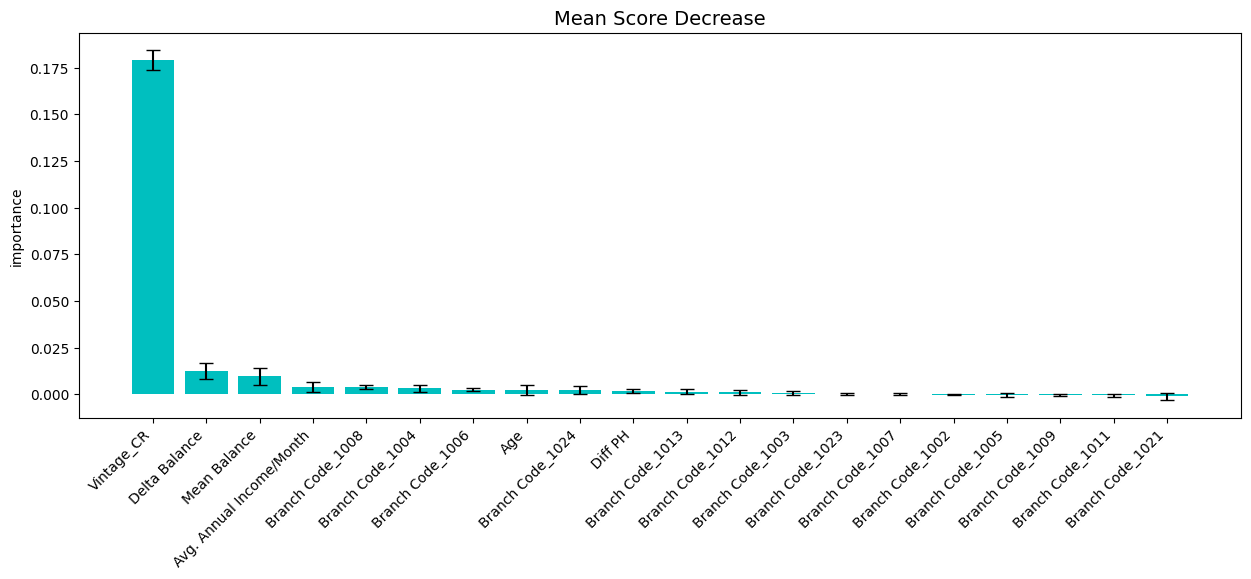

In [110]:
from jcopml.feature_importance import mean_score_decrease
df_imp1 = mean_score_decrease(x1_train, y1_train, grid, plot= True, topk=20)

## eksperimen 2

In [111]:
y2_pred =grid2.predict(x2_test)

In [112]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
metrics.completeness_score

Accuracy: 0.616130453944469
Recall: 0.33087330873308735


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [113]:
y2_pred_val =grid2.predict(x2_val)

In [114]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y2_pred_val))
print("Recall:",metrics.recall_score(y1_val, y2_pred_val))
metrics.completeness_score

Accuracy: 0.6135431821187673
Recall: 0.3233665559246955


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

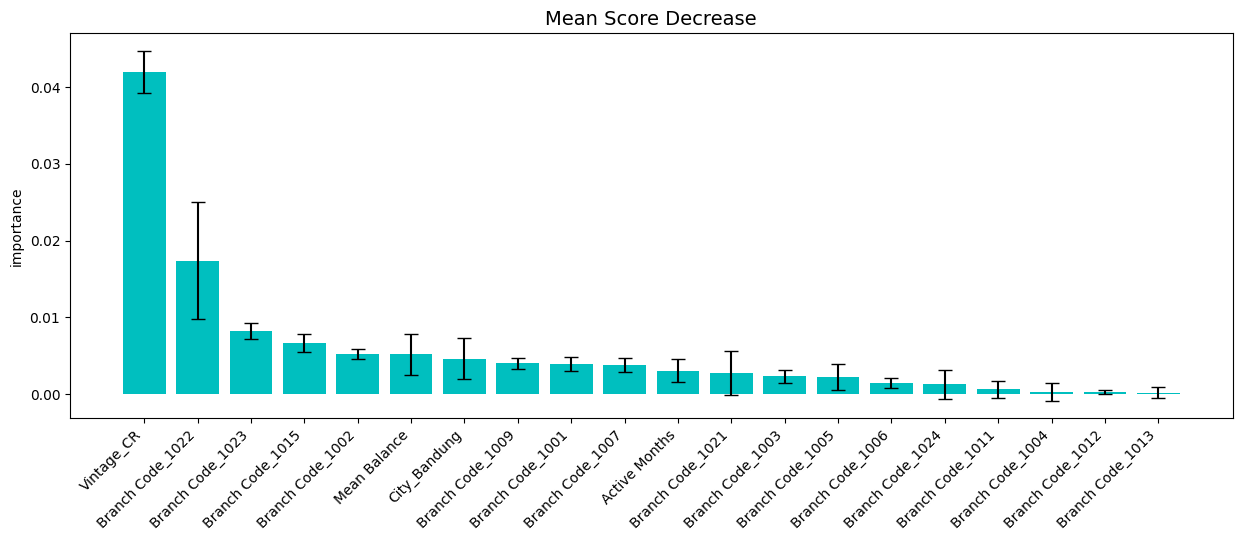

In [115]:
df_imp2 = mean_score_decrease(x2_train, y2_train, grid2, plot=True, topk=20)

## Gradient boositng

### eksperimen 1

In [116]:
y11_pred = GB_result.predict(x1_test)

In [117]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y11_pred))
print("Recall:",metrics.recall_score(y1_test, y11_pred))
metrics.completeness_score

Accuracy: 0.6862053768179814
Recall: 0.6056105610561056


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [118]:
y11_pred_val = GB_result.predict(x1_val)

In [119]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y1_pred_val))
print("Recall:",metrics.recall_score(y1_val, y1_pred_val))
metrics.completeness_score

Accuracy: 0.6388043909535775
Recall: 0.262827611664821


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

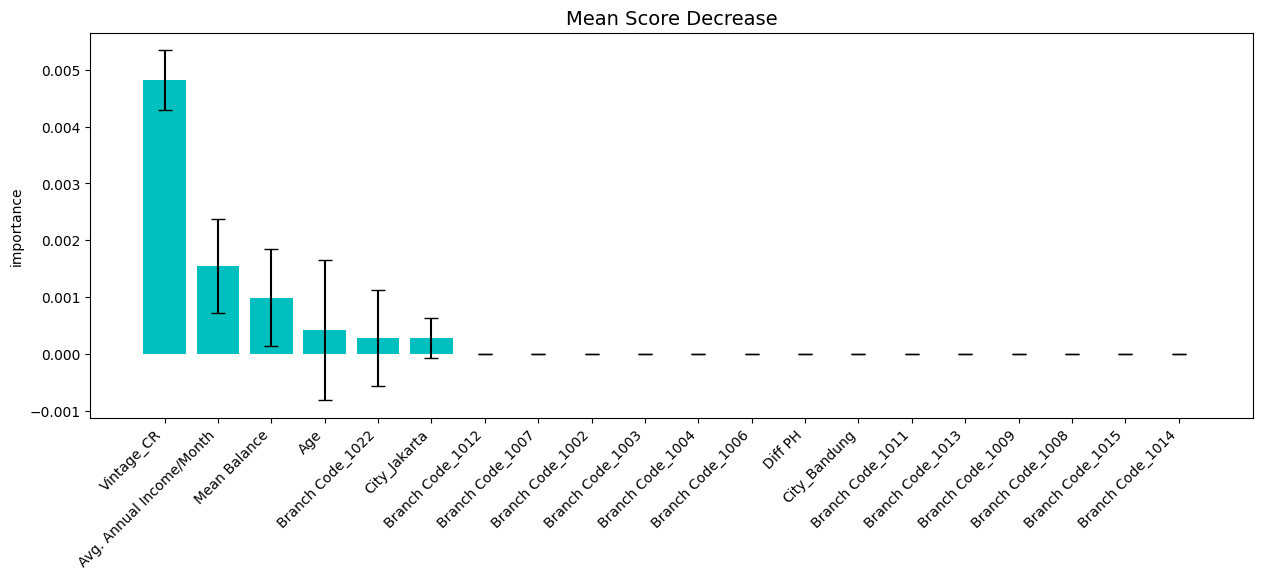

In [120]:
df_imp3 = mean_score_decrease(x1_train, y1_train, GB_Grid, plot=True, topk=20)

### eksperimen 2

In [133]:
y22_pred =GB_Grid2.predict(x2_test)

In [134]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y22_pred))
print("Recall:",metrics.recall_score(y2_test, y22_pred))
metrics.completeness_score

Accuracy: 0.3605112384310269
Recall: 0.984009840098401


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [136]:
y22_pred_val =GB_Grid2.predict(x2_val)

In [138]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y22_pred_val))
print("Recall:",metrics.recall_score(y2_val, y22_pred_val))
metrics.completeness_score

Accuracy: 0.3670149451130803
Recall: 0.9944629014396457


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

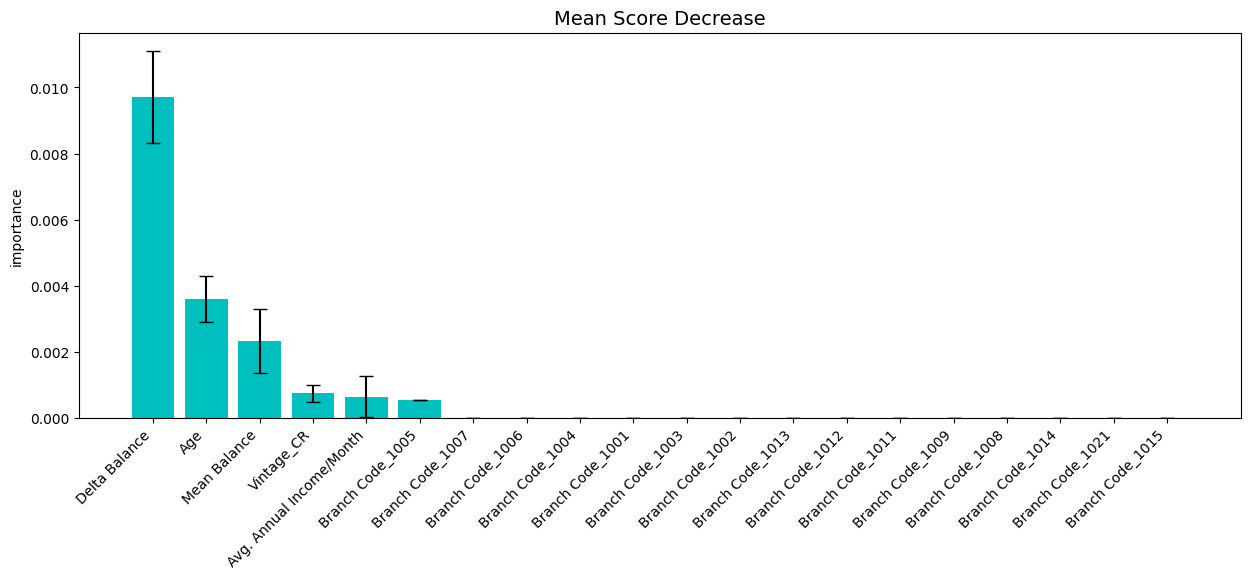

In [140]:
df_imp4 = mean_score_decrease(x2_train, y2_train, GB_Grid2, plot=True, topk=20)

# Random Forest

### Eksperimen 1

In [142]:
y12_pred = RF_Grid.predict(x1_test)

In [143]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y12_pred))
print("Recall:",metrics.recall_score(y1_test, y12_pred))
metrics.completeness_score

Accuracy: 0.8069634200088145
Recall: 0.334983498349835


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [144]:
y12_pred_val =RF_Grid.predict(x1_val)

In [145]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y12_pred_val))
print("Recall:",metrics.recall_score(y1_val, y12_pred_val))
metrics.completeness_score

Accuracy: 0.7033461182383283
Recall: 0.33813215208564046


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

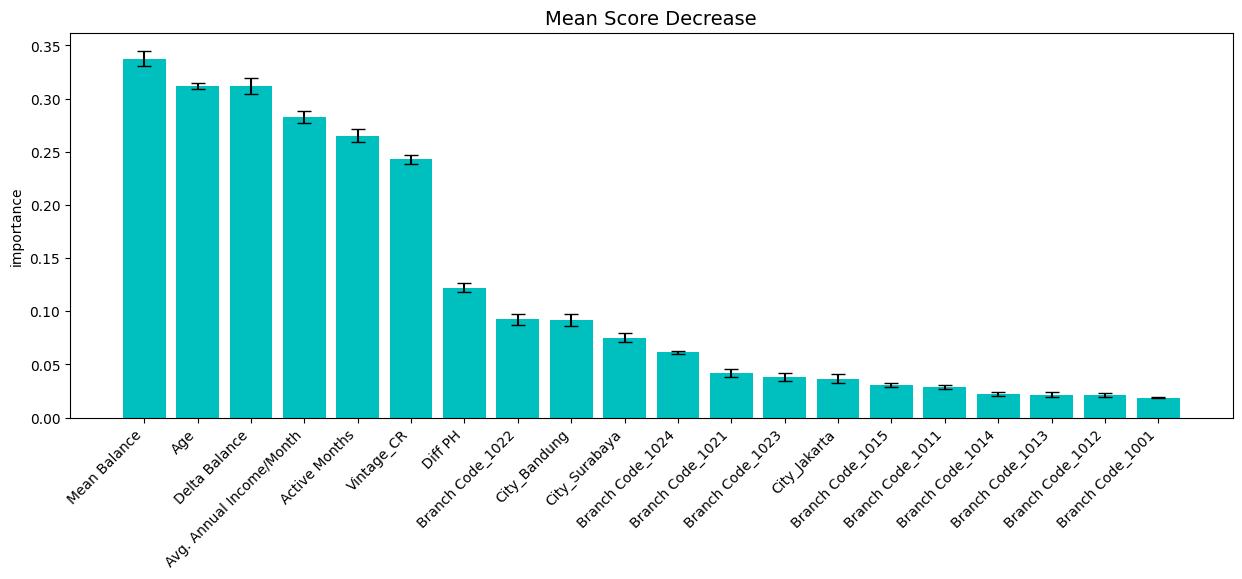

In [146]:
df_imp5 = mean_score_decrease(x1_train, y1_train, RF_Grid, plot=True, topk=20)

### Eksperimen 2

In [147]:
y21_perd = RF_Grid2.predict(x2_test)

In [148]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y21_perd))
print("Recall:",metrics.recall_score(y2_test, y21_perd))
metrics.completeness_score

Accuracy: 0.6553547818422213
Recall: 0.2029520295202952


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [149]:
y21_pred_val =RF_Grid2.predict(x2_val)

In [150]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y21_pred_val))
print("Recall:",metrics.recall_score(y2_val, y21_pred_val))
metrics.completeness_score

Accuracy: 0.8501520962835604
Recall: 0.6319675156884459


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

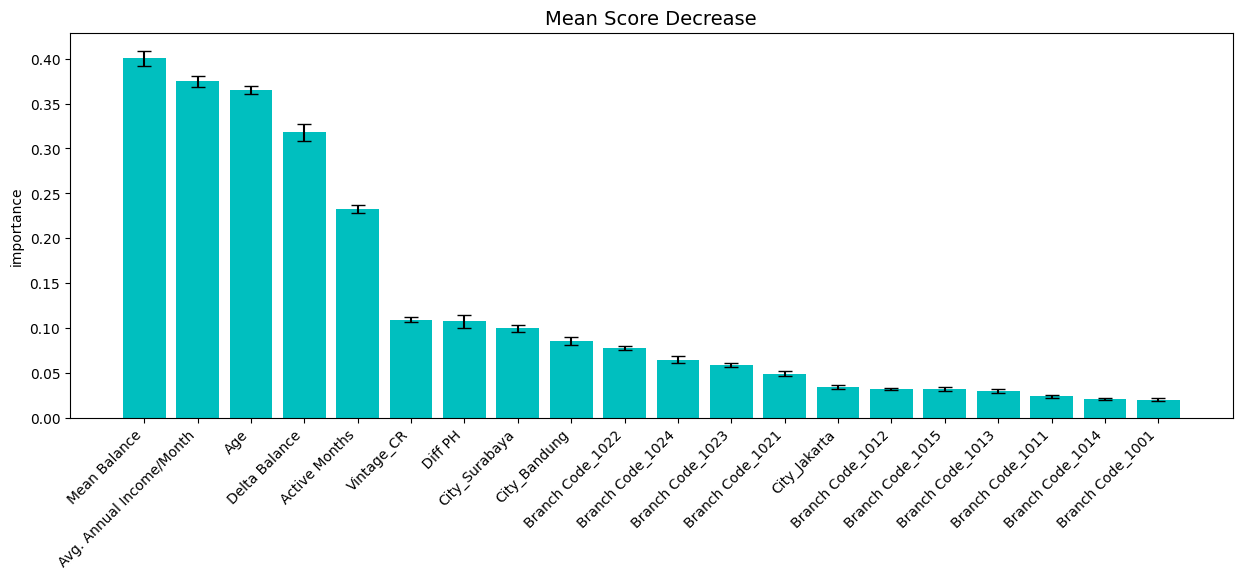

In [151]:
df_imp6 = mean_score_decrease(x2_train, y2_train, RF_Grid2, plot=True, topk=20)

# Kesimpulan

Dari semua model, rata-rata memiliki accuracy di atas 60% namun memiliki recall di bawah 40%. Artinya, masih banyak nasabah yang sebenarnya berpotensi gagal bayar namun diprediksi tidak akan gagal bayar. Sehingga bisa disampaikan bahwa dalam iterasi pembangunan model kali ini, objektif yang diinginkan masih belum dapat tercapai.

Solusi pengembangan kedepannya yang bisa dilakukan di antaranya:

1. Memperbanyak sample (jumlah nasabah dgn asumsi dataset yang tersedia saat ini bukan total populasi nasabah)
2. Melakukan oversampling terhadap kelas minoritas (gagal bayar) agar pembangunan model tidak bias
3. Memperluas horizon waktu
4. Mencoba variasi variabel lainnya (menambah variabel baru, atau membuang variabel yang memiliki nilai importance rendah pada hasil terakhir)
5. Mencoba memperluas kombinasi hyperparameter dalam pembangunan model
6. Mencoba algoritma supervised machine learning lainnya